In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout
from tensorflow.keras.optimizers import Adam

# Load the data
data = pd.read_csv('alternative_data_investment.csv', parse_dates=['Date'])

                                Date  Stock_Price  Social_Sentiment  \
count                           1566  1566.000000       1566.000000   
mean   2017-12-31 21:35:37.931034624   117.655731          0.001671   
min              2015-01-01 00:00:00    83.333893         -0.999977   
25%              2016-07-01 18:00:00    94.797373         -0.482713   
50%              2018-01-01 12:00:00   105.516150          0.010002   
75%              2019-07-02 18:00:00   144.455916          0.497562   
max              2020-12-31 00:00:00   179.186751          0.997785   
std                              NaN    26.303707          0.576723   

       Web_Traffic  Search_Trends  
count  1566.000000    1566.000000  
mean     99.040749      49.788937  
min      50.003072       0.391837  
25%      74.056632      24.767684  
50%      98.383138      49.370047  
75%     123.660561      74.987038  
max     149.955770      99.946068  
std      28.651540      28.867908  


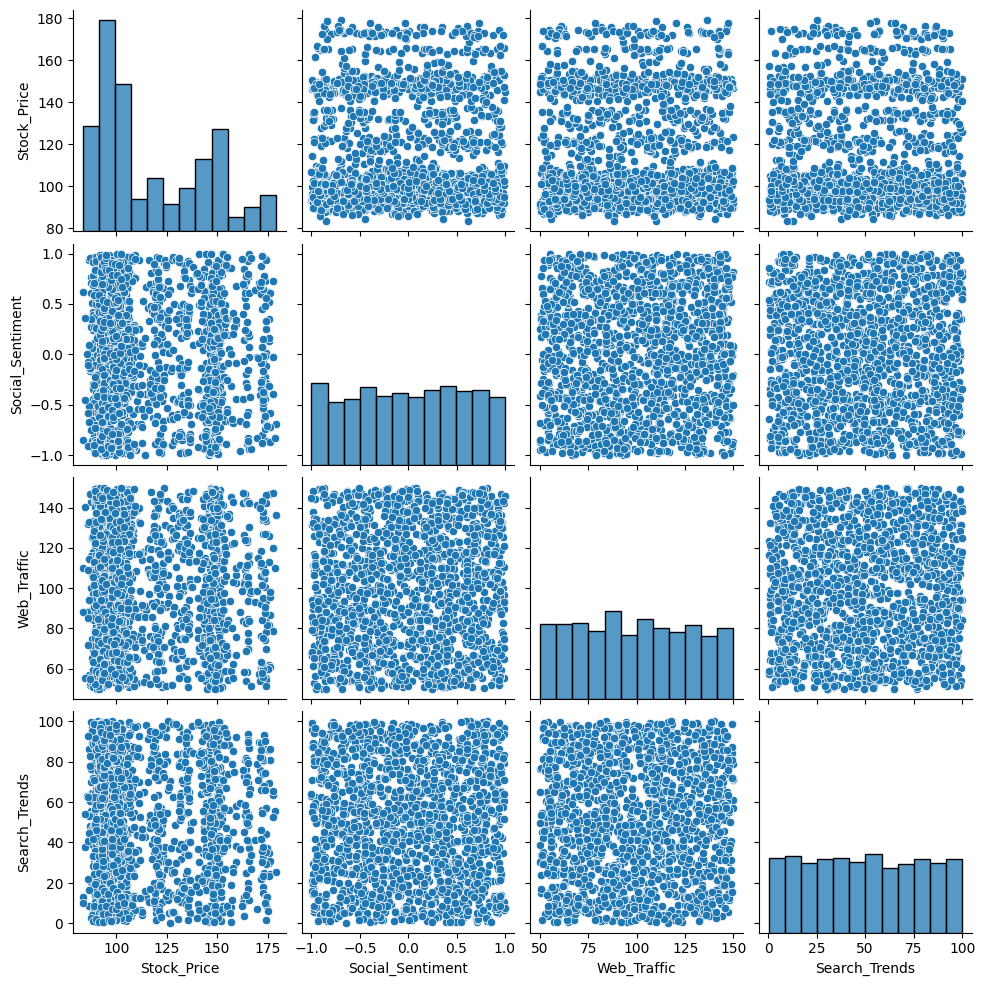

In [3]:
# EDA
print(data.describe())
sns.pairplot(data.drop(columns=['Date']))
plt.show()

In [4]:
# Scale data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['Date']))

# Prepare data for training
X = data_scaled[:, 1:]  # Using alternative data features
y = data_scaled[:, 0]  # Stock prices

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# LSTM
model_lstm = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], 1), return_sequences=True),
    LSTM(50),
    Dense(1)
])
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
32/32 [==============================] - 7s 65ms/step - loss: 0.1050 - mae: 0.2564 - val_loss: 0.0803 - val_mae: 0.2549
Epoch 2/50
32/32 [==============================] - 0s 14ms/step - loss: 0.0784 - mae: 0.2422 - val_loss: 0.0791 - val_mae: 0.2550
Epoch 3/50
32/32 [==============================] - 0s 14ms/step - loss: 0.0774 - mae: 0.2432 - val_loss: 0.0781 - val_mae: 0.2527
Epoch 4/50
32/32 [==============================] - 0s 13ms/step - loss: 0.0772 - mae: 0.2427 - val_loss: 0.0776 - val_mae: 0.2521
Epoch 5/50
32/32 [==============================] - 0s 14ms/step - loss: 0.0763 - mae: 0.2428 - val_loss: 0.0773 - val_mae: 0.2499
Epoch 6/50
32/32 [==============================] - 0s 14ms/step - loss: 0.0763 - mae: 0.2424 - val_loss: 0.0770 - val_mae: 0.2515
Epoch 7/50
32/32 [==============================] - 0s 13ms/step - loss: 0.0765 - mae: 0.2438 - val_loss: 0.0768 - val_mae: 0.2518
Epoch 8/50
32/32 [==============================] - 0s 13ms/step - loss: 0.0759 - m

In [6]:
# GRU
model_gru = Sequential([
    GRU(50, input_shape=(X_train.shape[1], 1), return_sequences=True),
    GRU(50),
    Dense(1)
])
model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
model_gru.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
32/32 [==============================] - 5s 33ms/step - loss: 0.0962 - mae: 0.2593 - val_loss: 0.0841 - val_mae: 0.2443
Epoch 2/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0774 - mae: 0.2429 - val_loss: 0.0783 - val_mae: 0.2499
Epoch 3/50
32/32 [==============================] - 0s 7ms/step - loss: 0.0768 - mae: 0.2427 - val_loss: 0.0780 - val_mae: 0.2475
Epoch 4/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0763 - mae: 0.2432 - val_loss: 0.0803 - val_mae: 0.2435
Epoch 5/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0773 - mae: 0.2428 - val_loss: 0.0779 - val_mae: 0.2464
Epoch 6/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0761 - mae: 0.2420 - val_loss: 0.0773 - val_mae: 0.2556
Epoch 7/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0766 - mae: 0.2440 - val_loss: 0.0767 - val_mae: 0.2535
Epoch 8/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0757 - mae: 0.2

In [7]:
# DNN
model_dnn = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
model_dnn.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
model_dnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
32/32 [==============================] - 1s 8ms/step - loss: 0.0983 - mae: 0.2569 - val_loss: 0.0846 - val_mae: 0.2555
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0865 - mae: 0.2467 - val_loss: 0.0822 - val_mae: 0.2515
Epoch 3/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0814 - mae: 0.2432 - val_loss: 0.0798 - val_mae: 0.2510
Epoch 4/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0806 - mae: 0.2447 - val_loss: 0.0785 - val_mae: 0.2505
Epoch 5/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0794 - mae: 0.2432 - val_loss: 0.0780 - val_mae: 0.2520
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0796 - mae: 0.2450 - val_loss: 0.0774 - val_mae: 0.2496
Epoch 7/50
32/32 [==============================] - 0s 5ms/step - loss: 0.0780 - mae: 0.2430 - val_loss: 0.0771 - val_mae: 0.2484
Epoch 8/50
32/32 [==============================] - 0s 5ms/step - loss: 0.0789 - mae: 0.24

In [8]:
mse_lstm, mae_lstm = model_lstm.evaluate(X_test, y_test)
mse_gru, mae_gru = model_gru.evaluate(X_test, y_test)
mse_dnn, mae_dnn = model_dnn.evaluate(X_test, y_test)

print(f'LSTM - MSE: {mse_lstm}, MAE: {mae_lstm}')
print(f'GRU - MSE: {mse_gru}, MAE: {mae_gru}')
print(f'DNN - MSE: {mse_dnn}, MAE: {mae_dnn}')

# Predict
y_pred_lstm = model_lstm.predict(X_test)
y_pred_gru = model_gru.predict(X_test)
y_pred_dnn = model_dnn.predict(X_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.0752 - mae: 0.2387
LSTM - MSE: 0.07535497099161148, MAE: 0.2396335005760193
GRU - MSE: 0.07422489672899246, MAE: 0.24194543063640594
DNN - MSE: 0.07517919689416885, MAE: 0.23866668343544006
10/10 [==============================] - 0s 2ms/step
